In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [128]:
df = pd.read_csv('/Users/irmac/Developer/Python/SI201/Projects/fall25-project1-Isaiahchonchoramirez/crop_yield.csv')

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB


In [130]:
df.sample(10)

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
535479,North,Clay,Barley,875.716623,20.565550,True,True,Cloudy,117,7.293724
662278,East,Loam,Soybean,505.444861,25.352272,True,False,Cloudy,127,4.275940
848503,East,Loam,Maize,229.741457,21.570173,True,False,Sunny,109,2.479053
68140,North,Chalky,Soybean,159.363953,34.159481,True,True,Rainy,82,4.589204
208837,South,Silt,Maize,266.561265,34.955251,False,True,Cloudy,137,3.296737
232349,East,Clay,Maize,395.445010,36.454880,True,False,Cloudy,143,3.596465
60454,East,Silt,Maize,128.942948,35.879697,True,True,Rainy,64,4.849692
326210,North,Sandy,Soybean,706.683567,34.698540,False,False,Rainy,108,3.296749
132679,South,Chalky,Cotton,961.021524,32.250456,False,False,Rainy,74,6.310005
167742,West,Loam,Maize,268.154614,29.735029,True,False,Rainy,90,3.509869


In [131]:
df.shape


(1000000, 10)

In [132]:
df.nunique()

Region                          4
Soil_Type                       6
Crop                            6
Rainfall_mm               1000000
Temperature_Celsius       1000000
Fertilizer_Used                 2
Irrigation_Used                 2
Weather_Condition               3
Days_to_Harvest                90
Yield_tons_per_hectare    1000000
dtype: int64

# Calculate yield per unit of rainfall (tons per mm).

Region
East     0.009879
North    0.009865
South    0.009862
West     0.009859
Name: Yield_per_mm, dtype: float64


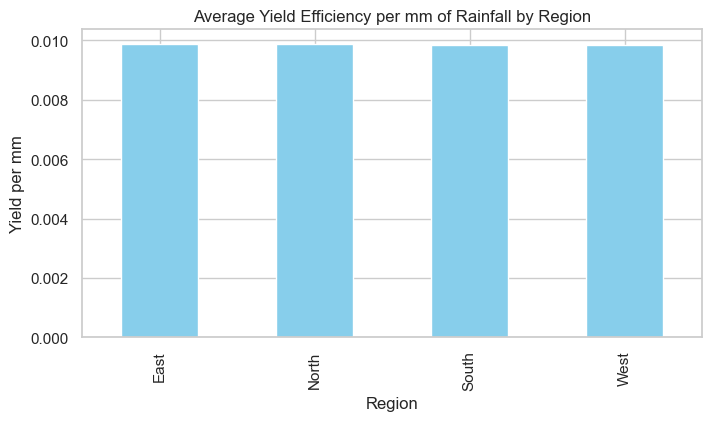

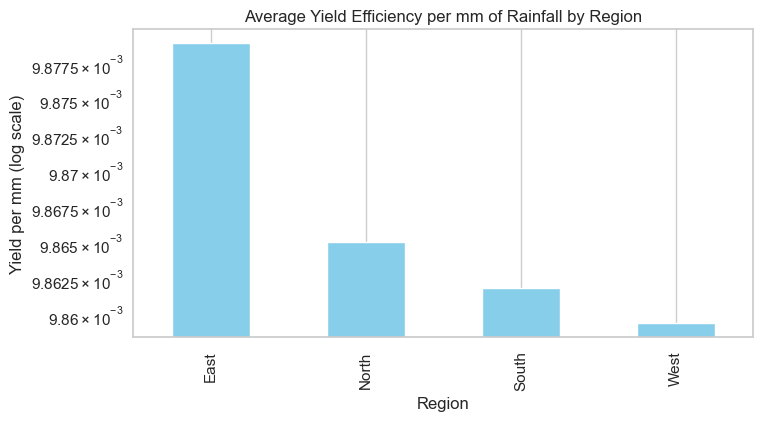

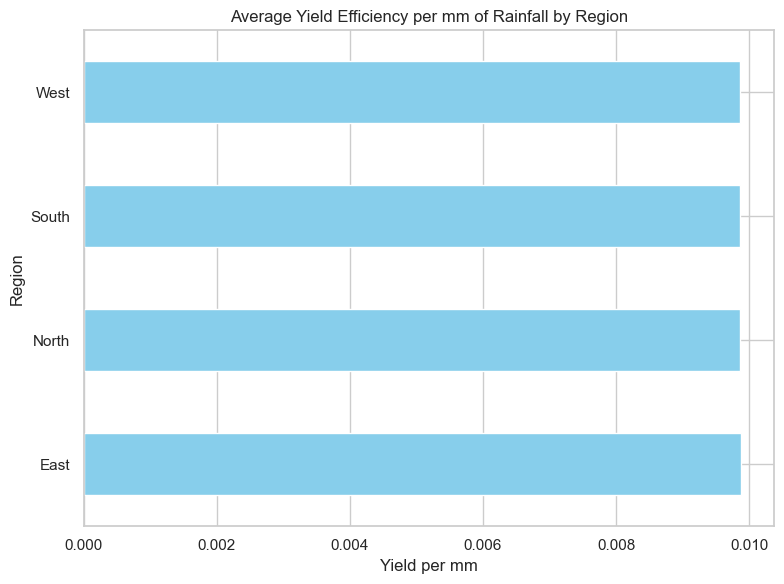

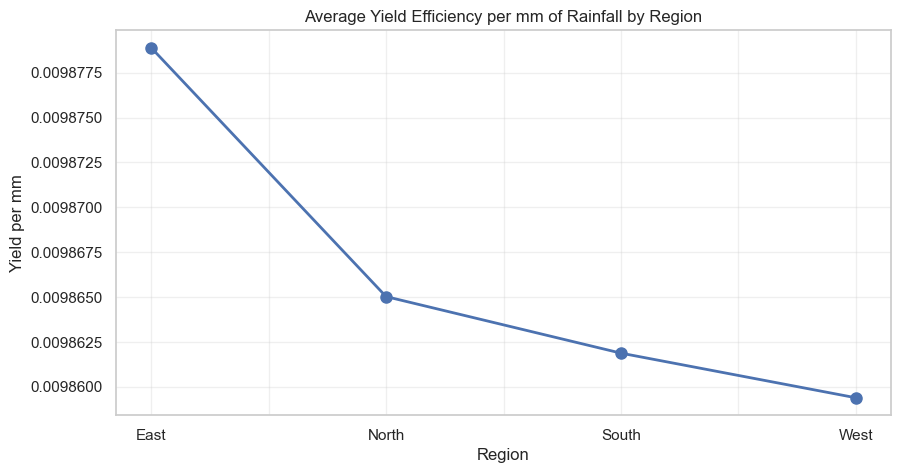

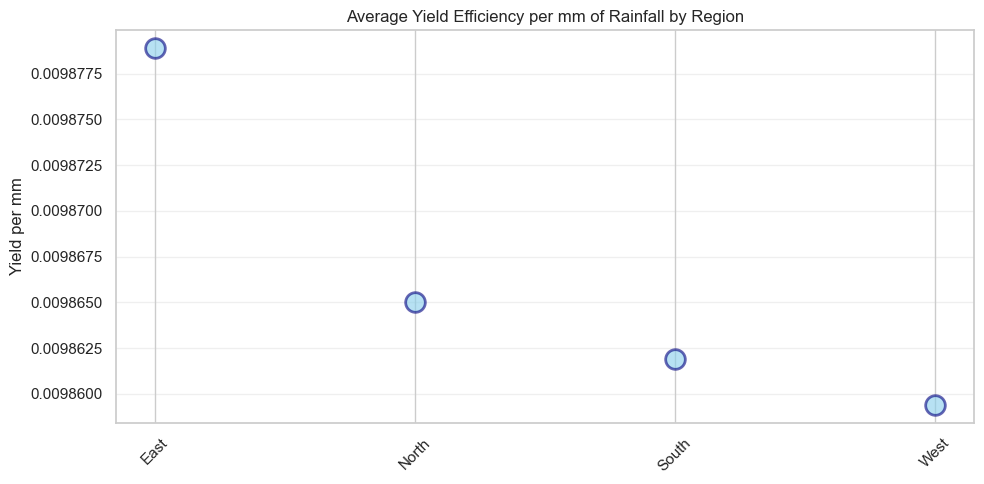

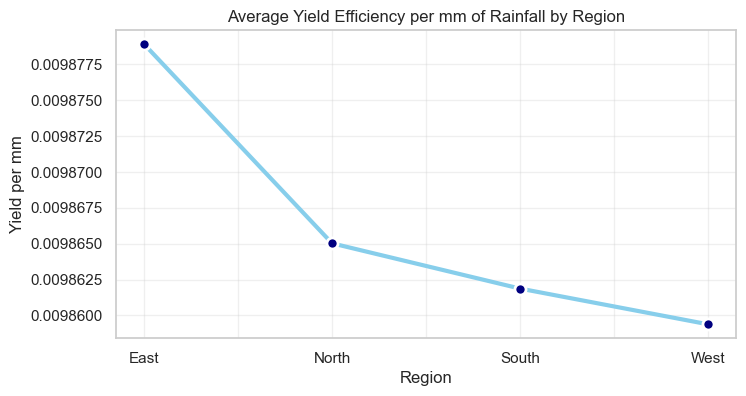

Weather_Condition      Cloudy       Rainy       Sunny
Region                                               
East               549.115683  550.427543  548.192370
North              549.362121  550.881209  552.131649
South              550.387516  549.766533  549.886966
West               549.030111  549.440559  551.159126


In [133]:
# Columns: Yield_tons_per_hectare, Rainfall_mm, Region
# Yield efficiency per rainfall unit by region
# Calculate yield per rainfall unit
df['Yield_per_mm'] = df['Yield_tons_per_hectare'] / df['Rainfall_mm']

# Group by region
region_yield_eff = df.groupby('Region')['Yield_per_mm'].mean().sort_values(ascending=False)
print(region_yield_eff)

# Plot
region_yield_eff.plot(kind='bar', color='skyblue', figsize=(8,4))
plt.title('Average Yield Efficiency per mm of Rainfall by Region')
plt.ylabel('Yield per mm')
plt.show()

region_yield_eff.plot(kind='bar', color='skyblue', figsize=(8,4))
plt.yscale('log')
plt.title('Average Yield Efficiency per mm of Rainfall by Region')
plt.ylabel('Yield per mm (log scale)')
plt.show()

region_yield_eff.plot(kind='barh', color='skyblue', figsize=(8,6))
plt.xlabel('Yield per mm')
plt.title('Average Yield Efficiency per mm of Rainfall by Region')
plt.tight_layout()
plt.show()

region_yield_eff.plot(kind='line', marker='o', linewidth=2, markersize=8, figsize=(10,5))
plt.title('Average Yield Efficiency per mm of Rainfall by Region')
plt.ylabel('Yield per mm')
plt.grid(True, alpha=0.3)
plt.show()

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(range(len(region_yield_eff)), region_yield_eff.values, s=200, alpha=0.6, color='skyblue', edgecolors='navy', linewidth=2)
ax.set_xticks(range(len(region_yield_eff)))
ax.set_xticklabels(region_yield_eff.index, rotation=45)
ax.set_ylabel('Yield per mm')
ax.set_title('Average Yield Efficiency per mm of Rainfall by Region')
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

region_yield_eff.plot(kind='line', color='skyblue', linewidth=3, markersize=8, figsize=(8,4), marker='o', markerfacecolor='navy', markeredgewidth=2, markeredgecolor='white')
plt.title('Average Yield Efficiency per mm of Rainfall by Region')
plt.ylabel('Yield per mm')
plt.grid(True, alpha=0.3)
plt.show()

df['Weather_Condition'].value_counts()
region_rain = df.pivot_table(index='Region', columns='Weather_Condition', values='Rainfall_mm', aggfunc='mean')
print(region_rain)




# Regional rain map / average rain per region.

Weather_Condition  Cloudy   Rainy   Sunny
Region                                   
East               549.12  550.43  548.19
North              549.36  550.88  552.13
South              550.39  549.77  549.89
West               549.03  549.44  551.16


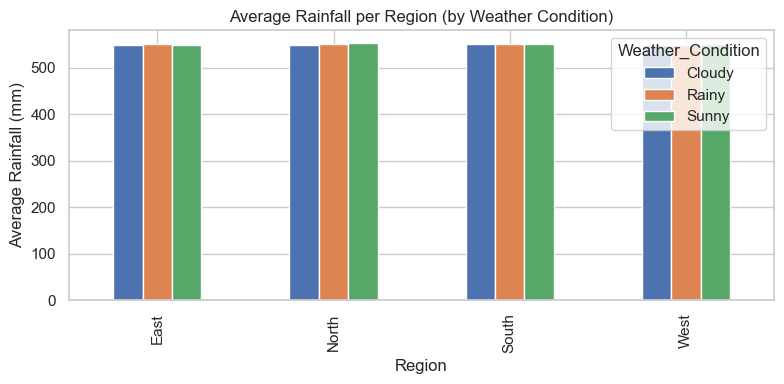

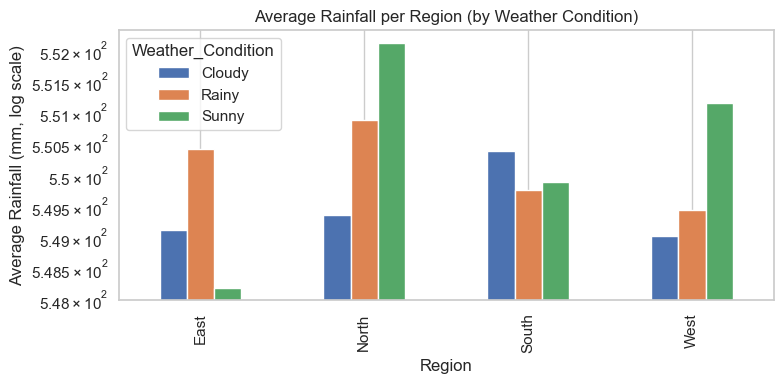

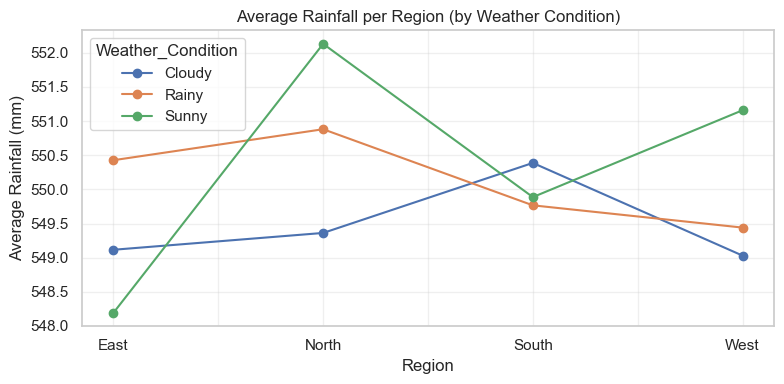

In [134]:
# Columns: Rainfall_mm, Region, Weather_Condition
# Which region gets the highest yield per mm of rainfall?
# Calculate average rainfall per region and weather condition
region_rain = (
    df.groupby(['Region', 'Weather_Condition'])['Rainfall_mm']
    .mean()
    .unstack()
    .fillna(0)
)

# Display table
print(region_rain.round(2))

# Plot
region_rain.plot(kind='bar', stacked=False, figsize=(8,4))
plt.title('Average Rainfall per Region (by Weather Condition)')
plt.ylabel('Average Rainfall (mm)')
plt.xlabel('Region')
plt.tight_layout()
plt.show()


# Plot with log scale
region_rain.plot(kind='bar', stacked=False, figsize=(8,4))
plt.yscale('log')
plt.title('Average Rainfall per Region (by Weather Condition)')
plt.ylabel('Average Rainfall (mm, log scale)')
plt.xlabel('Region')
plt.tight_layout()
plt.show()

# Plot with linear scale
region_rain.plot(kind='line', marker='o', figsize=(8,4))
plt.title('Average Rainfall per Region (by Weather Condition)')
plt.ylabel('Average Rainfall (mm)')
plt.xlabel('Region')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


# Crop yeild per region / per soil type.


Crop         Barley    Cotton     Maize      Rice   Soybean     Wheat
Soil_Type                                                            
Chalky     4.649948  4.663595  4.653498  4.640907  4.657995  4.651330
Clay       4.651793  4.645118  4.630174  4.646297  4.651116  4.644797
Loam       4.643126  4.633848  4.666891  4.651742  4.639517  4.671253
Peaty      4.650058  4.647561  4.635270  4.657866  4.661625  4.654183
Sandy      4.658929  4.652088  4.632811  4.654259  4.656205  4.636889
Silt       4.630665  4.662891  4.629473  4.653537  4.655866  4.658146


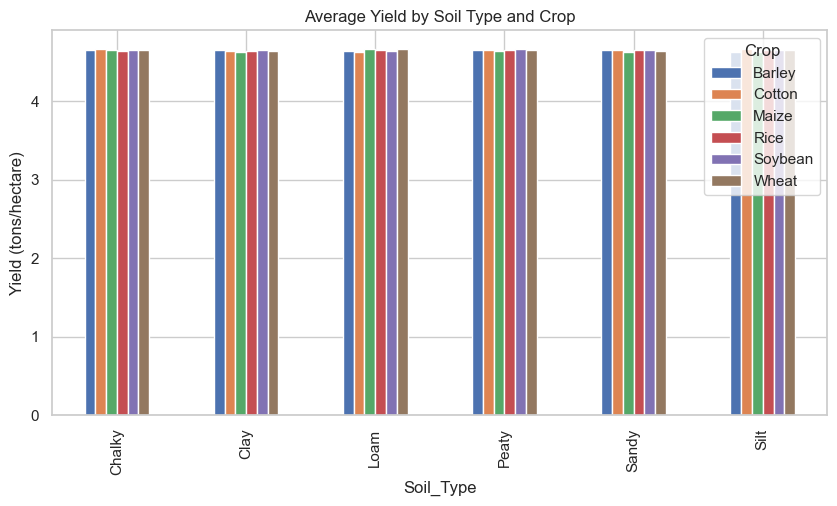

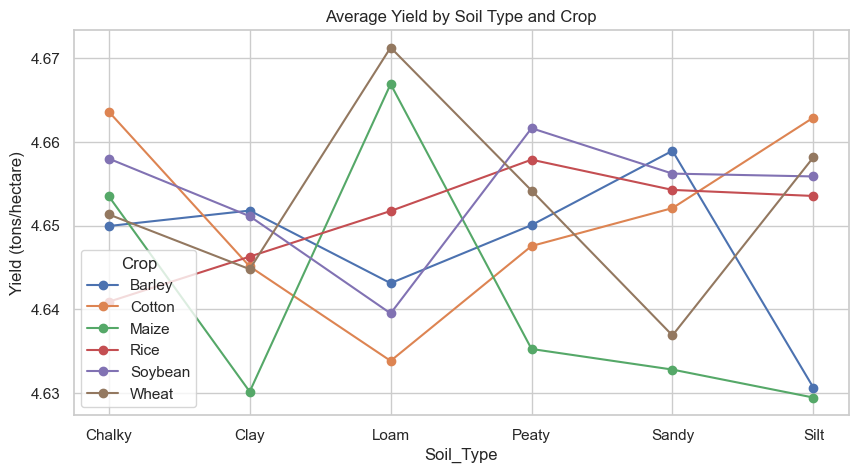

In [135]:
# Columns: Yield_tons_per_hectare, Soil_Type, Crop.
# How does soil type influence the yield for different crops?
soil_crop_yield = df.groupby(['Soil_Type', 'Crop'])['Yield_tons_per_hectare'].mean().unstack()
print(soil_crop_yield)

soil_crop_yield.plot(kind='bar', figsize=(10,5))
plt.title('Average Yield by Soil Type and Crop')
plt.ylabel('Yield (tons/hectare)')
plt.show()

soil_crop_yield.plot(kind='line', marker='o', figsize=(10,5))
plt.title('Average Yield by Soil Type and Crop')
plt.ylabel('Yield (tons/hectare)')
plt.show()


# Harvest time vs yield with irrigation/fertilizer

                                 Days_to_Harvest  Yield_tons_per_hectare
Irrigation_Used Fertilizer_Used                                         
False           False                 104.530224                3.302678
                True                  104.523817                4.799632
True            False                 104.513180                4.499366
                True                  104.412878                5.999009


/opt/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


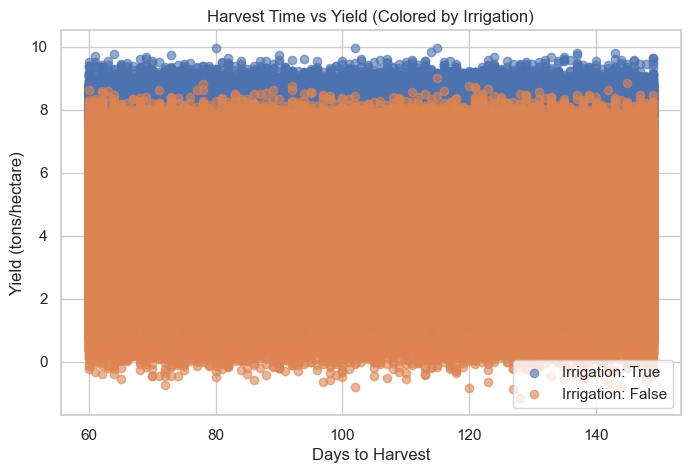

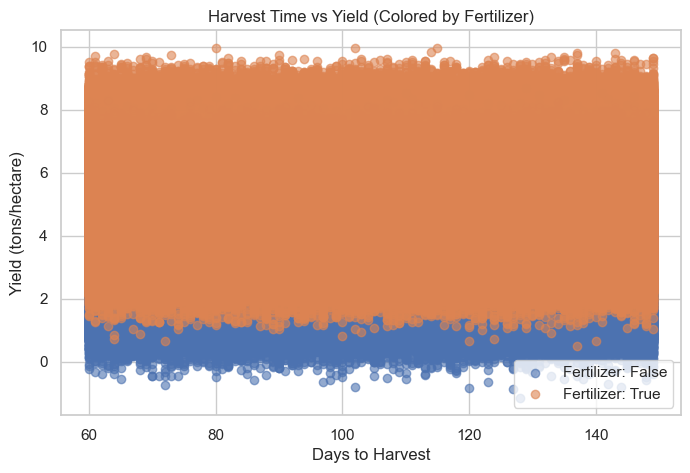

In [136]:
# Columns: Days_to_Harvest, Yield_tons_per_hectare, Irrigation_Used, Fertilizer_Used
# Do irrigation and fertilizer reduce time-to-harvest or increase yield?
# Average yield and harvest time based on irrigation/fertilizer
harvest_analysis = df.groupby(['Irrigation_Used', 'Fertilizer_Used'])[['Days_to_Harvest', 'Yield_tons_per_hectare']].mean()
print(harvest_analysis)

# Scatter plot
plt.figure(figsize=(8,5))
for irr in df['Irrigation_Used'].unique():
    subset = df[df['Irrigation_Used'] == irr]
    plt.scatter(subset['Days_to_Harvest'], subset['Yield_tons_per_hectare'], label=f'Irrigation: {irr}', alpha=0.6)
plt.legend()
plt.title('Harvest Time vs Yield (Colored by Irrigation)')
plt.xlabel('Days to Harvest')
plt.ylabel('Yield (tons/hectare)')
plt.show()

plt.figure(figsize=(8,5))
for fert in df['Fertilizer_Used'].unique():
    subset = df[df['Fertilizer_Used'] == fert]
    plt.scatter(subset['Days_to_Harvest'], subset['Yield_tons_per_hectare'], label=f'Fertilizer: {fert}', alpha=0.6)
plt.legend()
plt.title('Harvest Time vs Yield (Colored by Fertilizer)')
plt.xlabel('Days to Harvest')
plt.ylabel('Yield (tons/hectare)')
plt.show()


# Weather condition yield analysis.

Region                 East     North     South      West
Weather_Condition                                        
Cloudy             4.645841  4.644574  4.650179  4.648250
Rainy              4.649561  4.655289  4.645107  4.647133
Sunny              4.641403  4.662442  4.651227  4.652624


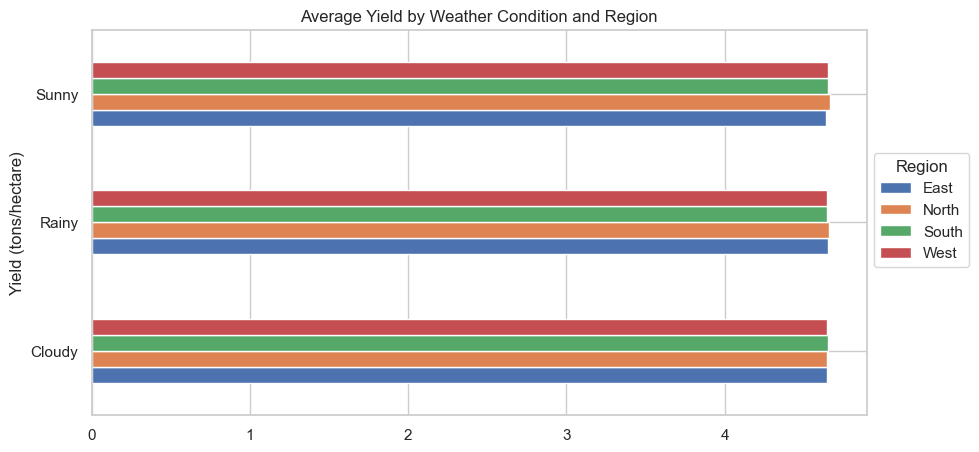

In [137]:
# Columns: Yield_tons_per_hectare, Weather_Condition, Region
# Which weather condition is associated with the highest yields across regions?
# Center 'Weather_Condition' on y-axis for better comparison
weather_yield = df.groupby(['Weather_Condition', 'Region'])['Yield_tons_per_hectare'].mean().unstack()
print(weather_yield)


weather_yield.plot(kind='barh', figsize=(10,5))
plt.legend(title='Region', bbox_to_anchor=(1, .7), loc='upper left')
plt.title('Average Yield by Weather Condition and Region')
plt.ylabel('Yield (tons/hectare)')
plt.show()



# Try and calculate z-score of percipitation vs soil, make a table.

Weather_Condition  Cloudy  Rainy  Sunny
Soil_Type                              
Chalky             -0.002  0.008  0.006
Clay               -0.000 -0.008  0.000
Loam                0.000  0.000 -0.004
Peaty              -0.002  0.002  0.003
Sandy              -0.005 -0.001  0.002
Silt               -0.003  0.003  0.001


<Figure size 800x400 with 0 Axes>

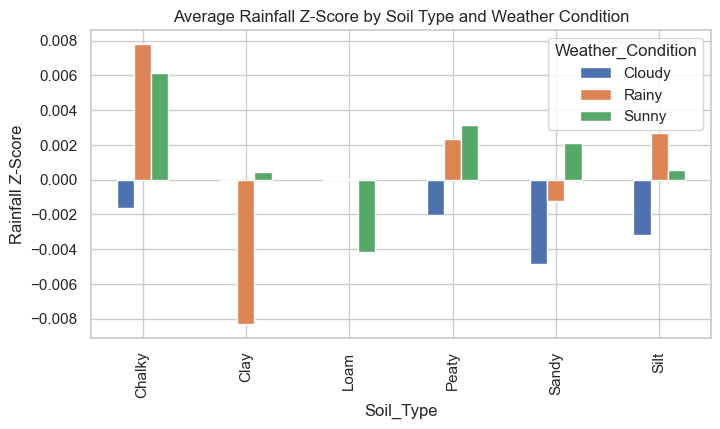

In [138]:
# Columns Soil_type, Rainfall_mm, and weather condition.
## Compute z-score for rainfall
df['Rainfall_zscore'] = (df['Rainfall_mm'] - df['Rainfall_mm'].mean()) / df['Rainfall_mm'].std()

rain_z = df.groupby(['Soil_Type', 'Weather_Condition'])['Rainfall_zscore'].mean().unstack()
print(rain_z.round(3))

plt.figure(figsize=(8,4))
rain_z.plot(kind='bar', figsize=(8,4))
plt.title('Average Rainfall Z-Score by Soil Type and Weather Condition')
plt.ylabel('Rainfall Z-Score')
plt.show()


In [139]:
print("Top region by yield per mm of rain:", region_yield_eff.idxmax())
print("Region with highest average rainfall:", region_rain.mean(axis=1).idxmax())
print("Weather condition with best yields:", weather_yield.mean(axis=1).idxmax())


Top region by yield per mm of rain: East
Region with highest average rainfall: North
Weather condition with best yields: Sunny


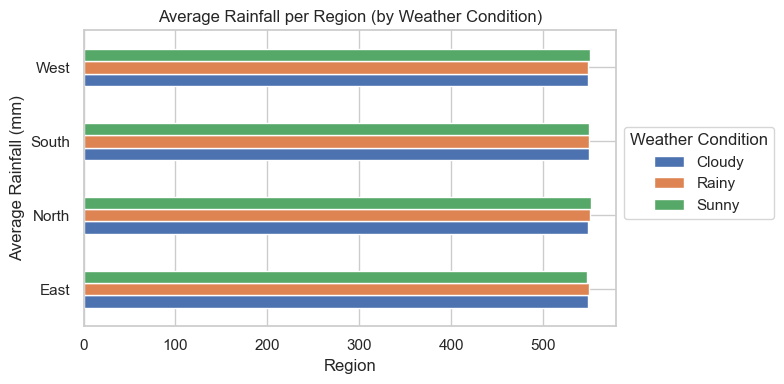

In [140]:
#Import seaborn for enhanced visualizations
import seaborn as sns
sns.set(style="whitegrid")
region_rain.plot(kind='barh', stacked=False, figsize=(8,4))
plt.legend(title='Weather Condition', bbox_to_anchor=(1, .7), loc='upper left')
plt.title('Average Rainfall per Region (by Weather Condition)')
plt.ylabel('Average Rainfall (mm)')
plt.xlabel('Region')
plt.tight_layout()
plt.show()

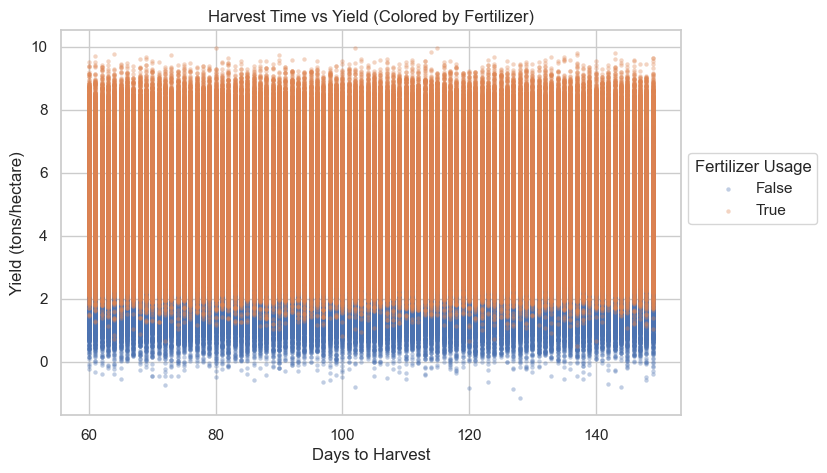

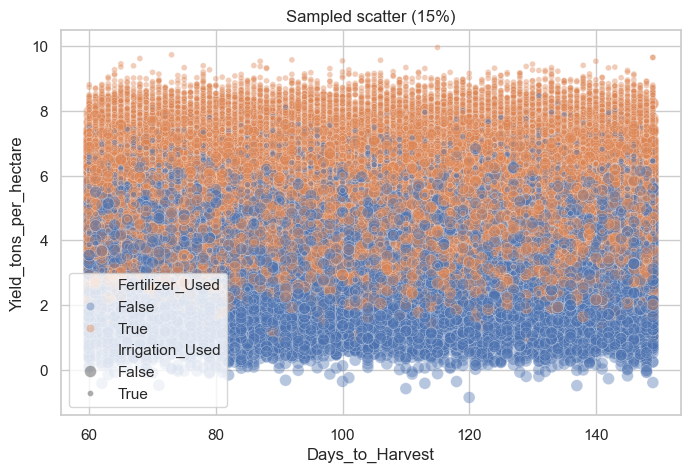

In [ ]:
plt.figure(figsize=(8,5))
for fert in df['Fertilizer_Used'].unique():     
    subset = df[df['Fertilizer_Used'] == fert]
    plt.scatter(subset['Days_to_Harvest'],subset['Yield_tons_per_hectare'],label=fert,alpha=0.35,s=10,linewidths=0,rasterized=True)
plt.legend(title='Fertilizer Usage', bbox_to_anchor=(1, .7), loc='upper left')
plt.title('Harvest Time vs Yield (Colored by Fertilizer)')
plt.xlabel('Days to Harvest')
plt.ylabel('Yield (tons/hectare)')
plt.show()

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
sample = df.sample(frac=0.15, random_state=42)  # 15% sample to reduce load time
plt.figure(figsize=(8,5))
sns.scatterplot(data=sample, x='Days_to_Harvest', y='Yield_tons_per_hectare',hue='Fertilizer_Used', size='Irrigation_Used', alpha=0.4, legend=True)
plt.title('Sampled scatter (15%)')
plt.savefig('sampled_scatter.png', bbox_inches='tight', dpi=150)
plt.show()


=== Density shows common yeild to days of harvest. ===


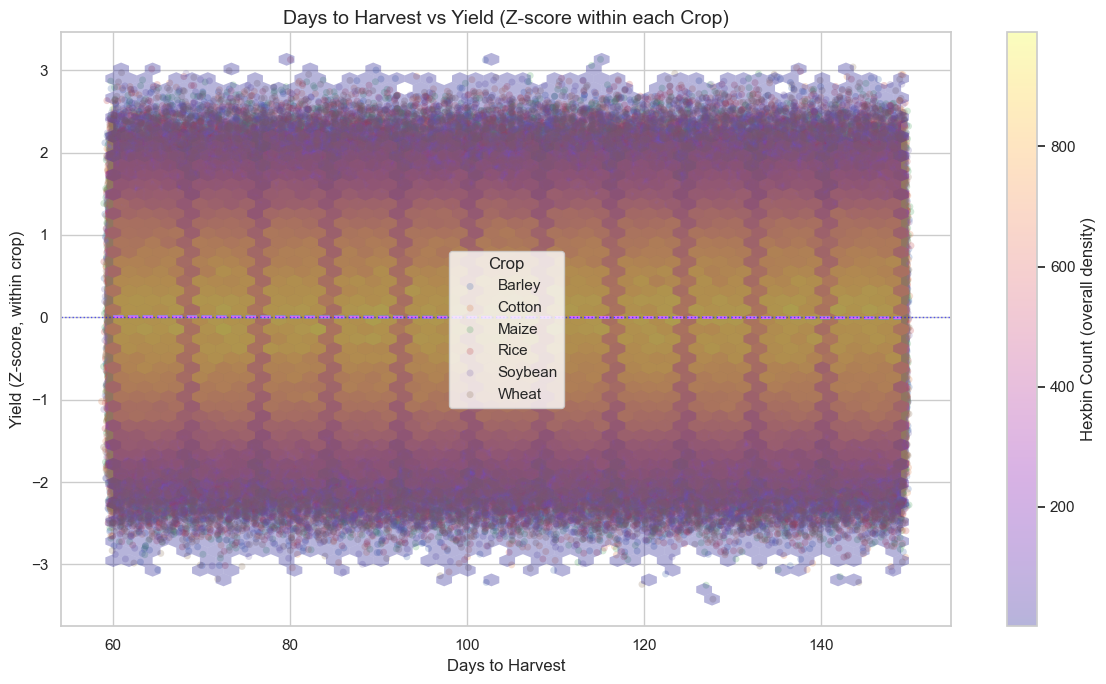


=== Average Yield Z-Score by Crop and Soil Type (Z computed within each crop) ===


Soil_Type,Chalky,Clay,Loam,Peaty,Sandy,Silt
Crop,,,,,,
Barley,0.001,0.003,-0.003,0.002,0.007,-0.010
Cotton,0.008,-0.003,-0.010,-0.002,0.001,0.007
Maize,0.007,-0.007,0.015,-0.004,-0.005,-0.007
Rice,-0.006,-0.003,0.001,0.004,0.002,0.002
Soybean,0.003,-0.002,-0.008,0.005,0.001,0.001
Wheat,-0.001,-0.005,0.011,0.001,-0.009,0.003


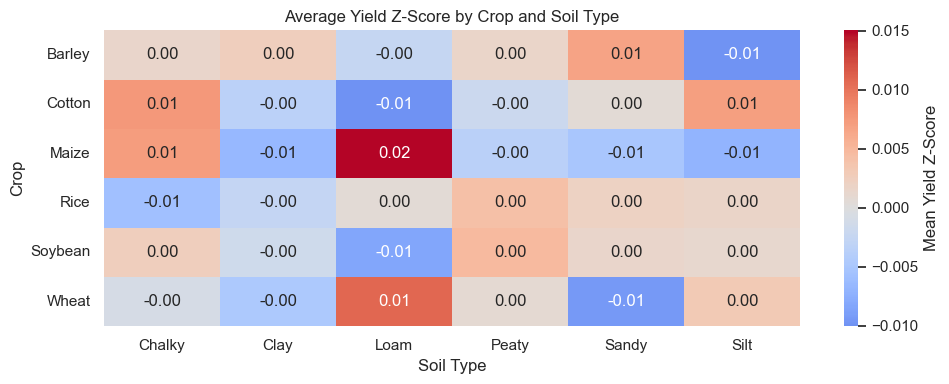

In [142]:
print("\n=== Density shows common yeild to days of harvest. ===")

sns.set(style="whitegrid")

# --- Prepare data & safe z-score by crop ---
# drop rows missing the core numeric fields we need
df_clean = df[['Crop', 'Days_to_Harvest', 'Yield_tons_per_hectare', 'Soil_Type']].copy().dropna()

# Compute yield z-score within each crop, but guard against zero std
def safe_z(s):
    std = s.std()
    if pd.isna(std) or std == 0:
        return (s - s.mean()) * 0.0  # return zeros so downstream code won't blow up
    return (s - s.mean()) / std

df_clean['Yield_zscore'] = df_clean.groupby('Crop')['Yield_tons_per_hectare'].transform(safe_z)

# --- Main plot: jittered scatter per crop (transparent) + trend lines where possible ---
plt.figure(figsize=(12,7))
ax = plt.gca()

crop_types = sorted(df_clean['Crop'].unique())
palette = sns.color_palette("husl", len(crop_types))

# scatter with slight jitter on x to reduce overplotting
jitter = .3
for crop, color in zip(crop_types, palette):
    sub = df_clean[df_clean['Crop'] == crop]
    if sub.empty:
        continue
    # jitter Days_to_Harvest for visibility
    x = sub['Days_to_Harvest'] + np.random.normal(loc=0, scale=jitter, size=len(sub))
    y = sub['Yield_zscore']
    ax.scatter(x, y, alpha=0.25, s=25, label=crop, edgecolor='none', rasterized=True)

    # Trend line only if at least 2 valid points and x not constant
    if len(sub) >= 2 and sub['Days_to_Harvest'].nunique() > 1:
        # safe polyfit (drop nan)
        xv = sub['Days_to_Harvest'].values
        yv = sub['Yield_zscore'].values
        mask = ~np.isnan(xv) & ~np.isnan(yv)
        if mask.sum() >= 2:
            try:
                coef = np.polyfit(xv[mask], yv[mask], 1)
                p = np.poly1d(coef)
                x_line = np.linspace(xv[mask].min(), xv[mask].max(), 100)
                ax.plot(x_line, p(x_line), color=color, linewidth=2.0, linestyle='--', alpha=0.9)
            except np.linalg.LinAlgError:
                pass  # if polyfit fails, just skip

# Add an overall hexbin for density (optional): uses entire df_clean
hb = ax.hexbin(df_clean['Days_to_Harvest'], df_clean['Yield_zscore'], gridsize=50,
               cmap='plasma', mincnt=1, alpha=0.3, edgecolors='none', rasterized=True)

ax.set_title('Days to Harvest vs Yield (Z-score within each Crop)', fontsize=14)
ax.set_xlabel('Days to Harvest', fontsize=12)
ax.set_ylabel('Yield (Z-score, within crop)', fontsize=12)
ax.axhline(0, color='blue', linestyle=':', linewidth=1, alpha=0.6)

# Legend and layout
ax.legend(title='Crop', bbox_to_anchor=(.5, .5), loc='center', frameon=True)
plt.colorbar(hb, ax=ax, label='Hexbin Count (overall density)')
plt.tight_layout()
plt.show()


# --- Summary statistics table: mean yield z-score per (Crop, Soil_Type) ---
# Note: Yield_zscore is computed within crop; we then average it for crop-soil combos
yield_z_table = (
    df_clean
    .groupby(['Crop', 'Soil_Type'])['Yield_zscore']
    .mean()
    .unstack(fill_value=np.nan)
)

print("\n=== Average Yield Z-Score by Crop and Soil Type (Z computed within each crop) ===")
display(yield_z_table.round(3))

# Heatmap of that table (only if the table has >1 row & column)
if yield_z_table.shape[0] > 1 and yield_z_table.shape[1] > 0:
    plt.figure(figsize=(10, max(4, 0.5 * yield_z_table.shape[0])))
    sns.heatmap(yield_z_table, annot=True, fmt=".2f", cmap="coolwarm", center=0, cbar_kws={'label': 'Mean Yield Z-Score'})
    plt.title('Average Yield Z-Score by Crop and Soil Type', fontsize=12)
    plt.ylabel('Crop')
    plt.xlabel('Soil Type')
    plt.tight_layout()
    plt.show()
else:
    print("Not enough rows/columns to render a meaningful heatmap.")


# Save results to csv file.

In [143]:
# Save results to csv file.
yield_z_table.to_csv('yield_zscore_by_crop_soil.csv')



In [144]:
# Save weather yield results to csv file.
weather_yield.to_csv('weather_yield_by_region.csv')

In [145]:
# Save region yield efficiency results to csv file.
region_yield_eff.to_csv('region_yield_efficiency.csv')

In [146]:
# Save final results to csv file.
final_df = df_clean[['Crop', 'Days_to_Harvest', 'Yield_tons_per_hectare', 'Soil_Type', 'Yield_zscore']]
final_df.to_csv('final_cleaned_data.csv', index=False)

In [147]:
# Close file handles if any were opened with rasterized=True
plt.close('all')
